In [1]:
import os
import sys
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [3]:
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10)
    train_loss[key] = []

In [4]:
def train():
    for i in range(max_iterations):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for key in optimizers.keys():
            grads = networks[key].gradient(x_batch, t_batch)
            optimizers[key].update(networks[key].params, grads)

            loss = networks[key].loss(x_batch, t_batch)
            train_loss[key].append(loss)

        if i % 100 == 0:
            print( "===========" + "iteration:" + str(i) + "===========")
            for key in optimizers.keys():
                loss = networks[key].loss(x_batch, t_batch)
                print(key + ": 2 " + str(loss))

In [14]:
def plot_gragh():
    plt.figure(figsize=(10, 10))
    markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
    x = np.arange(max_iterations)
    for key in optimizers.keys():
        plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

In [6]:
train()

===========iteration:0===========
SGD: 2 2.3742487660369758
Momentum: 2 2.520674075241968
AdaGrad: 2 2.0114023161582093
Adam: 2 2.150529997173911
===========iteration:100===========
SGD: 2 1.678657750561182
Momentum: 2 0.2903285582141981
AdaGrad: 2 0.08294725004501824
Adam: 2 0.19264628547362123
===========iteration:200===========
SGD: 2 0.8621208158657199
Momentum: 2 0.25479465623063974
AdaGrad: 2 0.08426132697045897
Adam: 2 0.15221350710767462
===========iteration:300===========
SGD: 2 0.5284698449684084
Momentum: 2 0.20177512960703434
AdaGrad: 2 0.057386543691144626
Adam: 2 0.16784992958150607
===========iteration:400===========
SGD: 2 0.3469758123784261
Momentum: 2 0.0912909054552574
AdaGrad: 2 0.036064662436309014
Adam: 2 0.061344949107934574
===========iteration:500===========
SGD: 2 0.3647138870222778
Momentum: 2 0.15664212473143052
AdaGrad: 2 0.03997524900970441
Adam: 2 0.11672232404988439
===========iteration:600===========
SGD: 2 0.4067682830930383
Momentum: 2 0.1278768205340

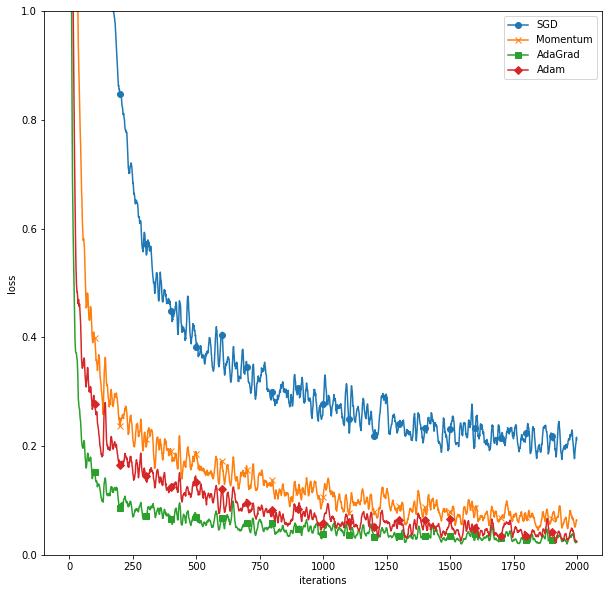

In [15]:
plot_gragh()